# Project: Investigate certain indicators in Gapminder Dataset
***

## By Odiba Anthony

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction
For my investigation, I selected the [Gapminder world dataset](http://www.gapminder.org/data/) which currently has a collection of about 519 different indicators. Each indicator contains years of information on different aspects that affect different countries. 

After going over the dataset, I thought it would be interesting to see how other regions in the world have being growing in terms of Income(GDP/capita PPS infaltion adjusted) as compaired to countries in africa.
Also, what trends can be observed betweeen Income and other Indicators like:

<ol>
<li>Income and $CO_2$</li>
<li>Income and Child Mortality</li>
<li>Income and Life Expectancy</li>
<li>Income and Self-Employed</li>
</ol> 

## 2. Importing relevant packages

In [138]:
#import os
##os.getcwd()
##os.chdir('/Users/****/Downloads')
#os.chdir('/Users/filepath/Investigate_a_DataSet')
#!pwd
#!ls -1t | head -5
##replace username 

In [38]:
income_chr="income_per_person_gdppercapita_ppp_inflation_adjusted.csv"
self_employed_chr="self_employed_percent_of_employment.csv"
hdi_chr="hdi_human_development_index(1).csv"
child_mortality_chr="child_mortality_0_5_year_olds_dying_per_1000_born.csv"
life_expectancy_chr="life_expectancy_years.csv"
co2_emissions_chr="co2_emissions_tonnes_per_person.csv"
country_code_chr='country_codes.csv'

In [39]:
from bqplot import (
    pyplot as plt,LogScale,LinearScale,OrdinalColorScale,
    ColorAxis,Axis,Scatter,Lines,CATEGORY10,Label,Figure,
    Tooltip
)
from ipywidgets import HBox,VBox,IntSlider,Play,jslink
import matplotlib.pyplot as plt2
import os
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import chardet
from scipy.stats import ttest_ind
from functools import reduce
%matplotlib inline

### Functions Used

In [40]:
'''function to look at the first 10000 bytes to guess the character encoding'''
def char_encoding(file):
    with open(file,'rb') as rawdata:
        result=chardet.detect(rawdata.read(10000))
        print(result)

In [41]:
'''function to find out the percentage of that is mising in each dataset'''
def percent_missing(dataset,dataset_name):
    total_cells=np.product(dataset.shape)
    missing_values_count=dataset.isnull().sum()
    total_missing=missing_values_count.sum()
    percent_missing=(total_missing/total_cells)*100
    print("%.2f%% of the %s dataset is missing." %(percent_missing,dataset_name))

In [42]:
'''
Rename initial df before transforming them the remane function does not work on transformed dfs
Rename label in various dataframes'''
def rename_label(df,col_name):
    df.rename(columns={"{}".format(col_name):'country'},inplace=True)
    return df
#the col_name variable is entered an str

'''most of the recent dataset from gapminder have been correctly formated and labeled appropriately
thus this step might be unnecessary '''

'most of the recent dataset from gapminder have been correctly formated and labeled appropriately\nthus this step might be unnecessary '

In [43]:
'''Transpose dataframe'''

def transform_dataframe(df):
    df.index=df[df.columns[0]]
    df_transfrom=df.drop(df.columns[0],axis=1)
    #df_transfrom.columns=map(lambda x: int(x), df_transfrom.columns)
    df_transfrom=df_transfrom.transpose()
    return df_transfrom

In [44]:
'''make sure df colume has been renamed for the merge to work properly 
the transformed df is what is called for the isnull function'''
def df_null(df,df_transform):
    df_null=pd.DataFrame(df_transform.isnull().sum())
    df_null=df_null.rename(columns={0:'Isnull_Sum'}).reset_index()
    isnull_count=list(df_transform.isnull().count())
    df_null['Count']=isnull_count
    Notnull_Sum=list(df_transform.notnull().sum())
    df_null['Notnull_Sum']=Notnull_Sum 
    df_null['Isnull_Density']=df_null['Isnull_Sum']/df_null['Count']
    df_null['Notnull_Density']=df_null['Notnull_Sum']/df_null['Count']
    merged_df=pd.merge(df,df_null,how='inner',on='country')
    return merged_df

#the next cell shows a more effecient way to achieve same result'''

In [45]:
'''I realised i can insert the list directly into the df without needing to go through the process 
of transform>convert to a Df> then merge'''

'I realised i can insert the list directly into the df without needing to go through the process \nof transform>convert to a Df> then merge'

In [46]:
''' df_transform.isnull().count() & df_transform.notnull().count() return the same thing'''
def df_null_density(df,df_transform):
    notnull_sum_list=list(df_transform.notnull().sum())
    isnull_sum_list=list(df_transform.isnull().sum())
    df['Notnull_Sum']=notnull_sum_list
    df['Isnull_Sum']=isnull_sum_list
    count_list=list(df_transform.isnull().count())
    df['Count']=count_list
    df['Isnull_Density']=df['Isnull_Sum']/df['Count']
    df['Notnull_Density']=df['Notnull_Sum']/df['Count']
    df.drop(['country'],axis=1,inplace=True)
    df.reset_index(inplace=True)
    return df

In [47]:
'''df here is the return value from df_notnull_density function'''

def useful_entries(df):
    df.drop(df[df['Isnull_Density']>=0.55].index,inplace=True)
    df.reset_index(inplace=True)
    df.drop(['index'],axis=1,inplace=True)
    #return df
#for i in df_new_list:
    #useful_entries(eval(i))
    
#new_merged_co2_dropped=new_merged_c02.drop(new_merged_c02[new_merged_c02['count']>=100],axis=1) 

In [48]:
'''the missing values in a column get assigned as imputes, the mean of that row'''
def row_mean_imputation(df):
    for i in range(df.shape[0]):
        row_mean=df.iloc[i,3:-5].mean()
        df.iloc[i]=df.iloc[i].fillna(row_mean)
    return df

In [49]:
'''Call this function on a list of merged dataframes after removing the unusable rows
according to an agreed threshold'''
df_list=[]
for df in df_list:
    del df.iloc[:,-5:-1]

<a id='wrangling'></a>
## 3. Data Wrangling

### General Properties

Find out encoding character

In [50]:
char_encoding(income_chr)
char_encoding(self_employed_chr)
char_encoding(hdi_chr)
char_encoding(child_mortality_chr)
char_encoding(life_expectancy_chr)
char_encoding(co2_emissions_chr)
char_encoding(country_code_chr)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'utf-8', 'confidence': 0.87625, 'language': ''}


In [51]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

income=pd.read_csv(income_chr,encoding='ascii')
co2_per_person=pd.read_csv(co2_emissions_chr,encoding='ascii')
child_mortality=pd.read_csv(child_mortality_chr,encoding='ascii')
life_expectancy=pd.read_csv(life_expectancy_chr,encoding='ascii')
self_employed=pd.read_csv(self_employed_chr,encoding='ascii')
hdi=pd.read_csv(hdi_chr,encoding='ascii')
country_code=pd.read_csv(country_code_chr,encoding='utf-8')

#income.set_index('Country')
#use pdseries.index.values to see the list of index ie income.index.values 

After reading in our data correctly, it is important we get an idea of what the data looks like and if there are any missing values.

In [52]:
country_code.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,region-code,sub-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [53]:
country_code.drop(['alpha-2','alpha-3','country-code','iso_3166-2','region-code','sub-region-code']
                  ,axis=1,inplace=True)

In [54]:
country_code.rename({'name':'country'},axis=1,inplace=True)

In [55]:
#I wrote a function to merge the country_code dataframe with the respective dataframes
def merge_with_country_code(df):
    df=country_code.merge(right=df,how='inner', on='country')
    return df

Call the merge_with_country_code function for each of the dataframes

In [56]:
income=merge_with_country_code(income)

In [57]:
income.head()

,country,region,sub-region,1800,1801,1802,1803,1804,1805,1806,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,Asia,Southern Asia,603,603,603,603,603,603,603,...,2420,2470,2520,2580,2640,2700,2760,2820,2880,2940
1,Albania,Europe,Southern Europe,667,667,667,667,667,668,668,...,18500,18900,19300,19700,20200,20600,21100,21500,22000,22500
2,Algeria,Africa,Northern Africa,715,716,717,718,719,720,721,...,15600,15900,16300,16700,17000,17400,17800,18200,18600,19000
3,Andorra,Europe,Southern Europe,1200,1200,1200,1200,1210,1210,1210,...,73200,74800,76400,78100,79900,81600,83400,85300,87200,89100
4,Angola,Africa,Middle Africa,618,620,623,626,628,631,634,...,6270,6410,6550,6700,6850,7000,7150,7310,7470,7640


In [58]:
hdi=merge_with_country_code(hdi)

In [59]:
hdi.head()

,country,region,sub-region,1990,1991,1992,1993,1994,1995,1996,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,Asia,Southern Asia,0.295,0.300,0.309,0.305,0.300,0.324,0.328,...,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
1,Albania,Europe,Southern Europe,0.635,0.618,0.603,0.608,0.616,0.628,0.637,...,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
2,Algeria,Africa,Northern Africa,0.577,0.581,0.587,0.591,0.595,0.600,0.609,...,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745
3,Andorra,Europe,Southern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858
4,Angola,Africa,Middle Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533


In [60]:
self_employed=merge_with_country_code(self_employed)

In [61]:
self_employed.head()

,country,region,sub-region,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,Asia,Southern Asia,63.8,65.6,70.8,76.2,74.5,73.3,74.8,...,66.4,66.6,67.1,67.2,67.3,67.3,67.3,67.3,67.2,67.1
1,Albania,Europe,Southern Europe,47.9,62.8,71.6,72.1,71.0,72.0,62.0,...,59.7,58.4,59.0,59.4,59.6,59.6,59.6,59.6,59.5,59.5
2,Algeria,Africa,Northern Africa,40.6,39.7,39.7,39.5,39.2,39.1,39.2,...,31.1,30.9,31.0,30.9,30.9,30.9,30.9,30.9,30.9,30.8
3,Angola,Africa,Middle Africa,74.5,71.4,69.7,67.8,66.9,66.5,66.7,...,71.1,71.0,71.1,71.5,71.6,71.5,71.5,71.5,71.4,71.4
4,Argentina,Americas,South America,29.7,29.8,31.2,29.7,29.4,29.1,28.2,...,24.8,25.1,25.2,25.1,24.9,24.9,24.8,24.8,24.7,24.7


In [62]:
child_mortality=merge_with_country_code(child_mortality)

In [63]:
child_mortality.head()

,country,region,sub-region,1800,1801,1802,1803,1804,1805,1806,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,Asia,Southern Asia,469.0,469.0,469.0,469.0,469.0,469.0,470.0,...,94.1,90.2,86.4,82.8,79.3,76.1,73.2,70.4,68.2,65.9
1,Albania,Europe,Southern Europe,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,17.2,16.6,16.0,15.4,14.9,14.4,14.0,13.5,13.3,12.9
2,Algeria,Africa,Northern Africa,460.0,460.0,460.0,460.0,460.0,460.0,460.0,...,28.3,27.3,26.6,26.1,25.8,25.6,25.5,25.2,23.9,23.1
3,Andorra,Europe,Southern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.4,3.3,3.2,3.1,3.0,2.9,2.8,2.7,NaN,NaN
4,Angola,Africa,Middle Africa,486.0,486.0,486.0,486.0,486.0,486.0,486.0,...,128.0,119.0,111.0,104.0,96.8,91.2,86.5,82.5,83.1,81.6


In [64]:
life_expectancy=merge_with_country_code(life_expectancy)

In [65]:
life_expectancy.head()

,country,region,sub-region,1800,1801,1802,1803,1804,1805,1806,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,Asia,Southern Asia,28.2,28.2,28.2,28.2,28.2,28.2,28.1,...,55.7,56.2,56.7,57.2,57.7,57.8,57.9,58.0,58.4,58.7
1,Albania,Europe,Southern Europe,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,75.9,76.3,76.7,77.0,77.2,77.4,77.6,77.7,77.9,78.0
2,Algeria,Africa,Northern Africa,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,76.3,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.6,77.9
3,Andorra,Europe,Southern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.7,82.7,82.6,82.6,82.6,82.6,82.5,82.5,NaN,NaN
4,Angola,Africa,Middle Africa,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,59.3,60.1,60.9,61.7,62.5,63.3,64.0,64.7,64.9,65.2


In [66]:
co2_per_person=merge_with_country_code(co2_per_person)

In [67]:
co2_per_person.head()

,country,region,sub-region,1800,1801,1802,1803,1804,1805,1806,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,Asia,Southern Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,Europe,Southern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,Africa,Northern Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720
3,Andorra,Europe,Southern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.92,5.900,5.830
4,Angola,Africa,Middle Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.33,1.250,1.290


In [68]:
#pandas_profiling.ProfileReport()
#after combining the different datasets using melt and merge, use pandas profilling to get summary stats

Sure enough, we can see from the first 5 rows of some of the datasets that there are missing valus represented by NaN. To get a scale of the amount of missing values in each dataset, we will find the number of missing values as apercentage of the total cells. In order to do this we call the ***percent_missing*** function for each dataset. 

In [69]:
#create a list for all the dataframes we are using
df_list=['income','co2_per_person','hdi','child_mortality','life_expectancy','self_employed']

In [70]:
for i in df_list:
    percent_missing(eval(i),i)

0.00% of the income dataset is missing.
58.63% of the co2_per_person dataset is missing.
9.60% of the hdi dataset is missing.
3.87% of the child_mortality dataset is missing.
1.43% of the life_expectancy dataset is missing.
0.00% of the self_employed dataset is missing.





We are going to take a closer look at our dataset. A more effecient way to clean up the dataset will be to deal with each column(rows) with missing values and not by using dropna() or dropna(axis=1). 

### 3 DATA CLEANING
### Dealing with missing data

To deal with the missing data values in each dataframe, I used both approaches of ***Partial Deletion*** and ***Imputation***.

The first method used for dealing with missing data values was partial deletion,and it involved limiting our dataset for analysis to the values that are available to us.

All the Dataframes for each chosen indicator are alike in that, they have the some qualitative data varying per year, for each country in each dataframe. I used a variation of **listwise deletion**, a type of partial deletion, in each of the dataframes to remove countries that had too many missing data values to be statistically representative. In this case instead of deleting records that had only one value missing, I used a threshold.
>The threshold I used to determine which countries I should drop is countries that had >= 50% complete data,
or countries with **'Notnull_Density'** of **>=0.5** 
I am aware that choosing a Notnull_Density value as low 0.5 will affect the quality of the analysis, but I wanted to capture more countries.
>Moreover, I noticed that most of the countries that have more complete data used an estimated value from 1800 to 1820.

In order to achieve this here are the steps we took.

<Ul>
    <li>Firstly, Make sure each dataframe is labeled appropriately</li>
    <li>Then transform each dataframe so as to effectively calculate the Null density</li>
    <li>For each dataframe, calculate the Null or NaN density using the dataframe and the transformed dataframe, then attach the Nan density to the dataframe</li>
    <li>Drop the records that don't meet the threshold for each dataframe</li>
    <li>For each dataframe, remove the the columes that aren't useful and Join the country_code dataframe</li>
    <li>Imputation of missing data</li>
    <li>Make sure all the dataframes have common countries</li>
</Ul>

#### 3.1 Rename the columes in the dataframe
Most of the recent data from gapminder have been appropriately labeld thus we didn't need to perform this step

#### 3.2 Treansofming the DataFrame
Transform the pandas Dataframe for each of the Indicators to have years as rows and country as column 

In [71]:
income_tf=transform_dataframe(income)

In [72]:
hdi_tf=transform_dataframe(hdi)

In [73]:
co2_per_person_tf=transform_dataframe(co2_per_person)

In [74]:
life_expectancy_tf=transform_dataframe(life_expectancy)

In [75]:
child_mortality_tf=transform_dataframe(child_mortality)

In [76]:
self_employed_tf=transform_dataframe(self_employed)

#### 3.3 Calculate the NaN density
Using the transformed dataframe and the original dataframe we can calculate the null density(the number of null values as a fraction of the total entries in that record). We then append the Null density to that dataframe. To achieve this we us the **df_null_density(df,df_transform)** function.

In [77]:
df_income=df_null_density(income,income_tf)

In [78]:
df_income.head()

,country,region,sub-region,1800,1801,1802,1803,1804,1805,1806,...,2036,2037,2038,2039,2040,Notnull_Sum,Isnull_Sum,Count,Isnull_Density,Notnull_Density
0,Afghanistan,Asia,Southern Asia,603,603,603,603,603,603,603,...,2700,2760,2820,2880,2940,243,0,243,0.0,1.0
1,Albania,Europe,Southern Europe,667,667,667,667,667,668,668,...,20600,21100,21500,22000,22500,243,0,243,0.0,1.0
2,Algeria,Africa,Northern Africa,715,716,717,718,719,720,721,...,17400,17800,18200,18600,19000,243,0,243,0.0,1.0
3,Andorra,Europe,Southern Europe,1200,1200,1200,1200,1210,1210,1210,...,81600,83400,85300,87200,89100,243,0,243,0.0,1.0
4,Angola,Africa,Middle Africa,618,620,623,626,628,631,634,...,7000,7150,7310,7470,7640,243,0,243,0.0,1.0


In [79]:
df_hdi=df_null_density(hdi,hdi_tf)

In [80]:
df_hdi.head()

,country,region,sub-region,1990,1991,1992,1993,1994,1995,1996,...,2011,2012,2013,2014,2015,Notnull_Sum,Isnull_Sum,Count,Isnull_Density,Notnull_Density
0,Afghanistan,Asia,Southern Asia,0.295,0.300,0.309,0.305,0.300,0.324,0.328,...,0.463,0.470,0.476,0.479,0.479,28,0,28,0.000000,1.000000
1,Albania,Europe,Southern Europe,0.635,0.618,0.603,0.608,0.616,0.628,0.637,...,0.752,0.759,0.761,0.762,0.764,28,0,28,0.000000,1.000000
2,Algeria,Africa,Northern Africa,0.577,0.581,0.587,0.591,0.595,0.600,0.609,...,0.732,0.737,0.741,0.743,0.745,28,0,28,0.000000,1.000000
3,Andorra,Europe,Southern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.819,0.843,0.850,0.857,0.858,8,20,28,0.714286,0.285714
4,Angola,Africa,Middle Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.508,0.523,0.527,0.531,0.533,19,9,28,0.321429,0.678571


In [81]:
df_co2_per_person=df_null_density(co2_per_person,co2_per_person_tf)

In [82]:
df_co2_per_person.head()

,country,region,sub-region,1800,1801,1802,1803,1804,1805,1806,...,2010,2011,2012,2013,2014,Notnull_Sum,Isnull_Sum,Count,Isnull_Density,Notnull_Density
0,Afghanistan,Asia,Southern Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.294,0.412,0.35,0.316,0.299,68,149,217,0.686636,0.313364
1,Albania,Europe,Southern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.560,1.790,1.68,1.730,1.960,84,133,217,0.612903,0.387097
2,Algeria,Africa,Northern Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.300,3.290,3.46,3.510,3.720,107,110,217,0.506912,0.493088
3,Andorra,Europe,Southern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.120,5.870,5.92,5.900,5.830,27,190,217,0.875576,0.124424
4,Angola,Africa,Middle Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.240,1.250,1.33,1.250,1.290,67,150,217,0.691244,0.308756


In [83]:
df_life_expectancy=df_null_density(life_expectancy,life_expectancy_tf)

In [84]:
df_life_expectancy.head()

,country,region,sub-region,1800,1801,1802,1803,1804,1805,1806,...,2014,2015,2016,2017,2018,Notnull_Sum,Isnull_Sum,Count,Isnull_Density,Notnull_Density
0,Afghanistan,Asia,Southern Asia,28.2,28.2,28.2,28.2,28.2,28.2,28.1,...,57.8,57.9,58.0,58.4,58.7,221,0,221,0.000000,1.000000
1,Albania,Europe,Southern Europe,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,77.4,77.6,77.7,77.9,78.0,221,0,221,0.000000,1.000000
2,Algeria,Africa,Northern Africa,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,77.1,77.3,77.4,77.6,77.9,221,0,221,0.000000,1.000000
3,Andorra,Europe,Southern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.6,82.5,82.5,NaN,NaN,49,172,221,0.778281,0.221719
4,Angola,Africa,Middle Africa,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,63.3,64.0,64.7,64.9,65.2,221,0,221,0.000000,1.000000


In [85]:
df_child_mortality=df_null_density(child_mortality,child_mortality_tf)

In [86]:
df_child_mortality.head()

,country,region,sub-region,1800,1801,1802,1803,1804,1805,1806,...,2014,2015,2016,2017,2018,Notnull_Sum,Isnull_Sum,Count,Isnull_Density,Notnull_Density
0,Afghanistan,Asia,Southern Asia,469.0,469.0,469.0,469.0,469.0,469.0,470.0,...,76.1,73.2,70.4,68.2,65.9,221,0,221,0.000000,1.000000
1,Albania,Europe,Southern Europe,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,14.4,14.0,13.5,13.3,12.9,221,0,221,0.000000,1.000000
2,Algeria,Africa,Northern Africa,460.0,460.0,460.0,460.0,460.0,460.0,460.0,...,25.6,25.5,25.2,23.9,23.1,221,0,221,0.000000,1.000000
3,Andorra,Europe,Southern Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.9,2.8,2.7,NaN,NaN,34,187,221,0.846154,0.153846
4,Angola,Africa,Middle Africa,486.0,486.0,486.0,486.0,486.0,486.0,486.0,...,91.2,86.5,82.5,83.1,81.6,221,0,221,0.000000,1.000000


In [87]:
df_self_employed=df_null_density(self_employed,self_employed_tf)

In [88]:
df_self_employed.head()

,country,region,sub-region,1991,1992,1993,1994,1995,1996,1997,...,2018,2019,2020,2021,2022,Notnull_Sum,Isnull_Sum,Count,Isnull_Density,Notnull_Density
0,Afghanistan,Asia,Southern Asia,63.8,65.6,70.8,76.2,74.5,73.3,74.8,...,67.3,67.3,67.3,67.2,67.1,34,0,34,0.0,1.0
1,Albania,Europe,Southern Europe,47.9,62.8,71.6,72.1,71.0,72.0,62.0,...,59.6,59.6,59.6,59.5,59.5,34,0,34,0.0,1.0
2,Algeria,Africa,Northern Africa,40.6,39.7,39.7,39.5,39.2,39.1,39.2,...,30.9,30.9,30.9,30.9,30.8,34,0,34,0.0,1.0
3,Angola,Africa,Middle Africa,74.5,71.4,69.7,67.8,66.9,66.5,66.7,...,71.5,71.5,71.5,71.4,71.4,34,0,34,0.0,1.0
4,Argentina,Americas,South America,29.7,29.8,31.2,29.7,29.4,29.1,28.2,...,24.9,24.8,24.8,24.7,24.7,34,0,34,0.0,1.0


#### 3.4 Drop the records that don't meet the threshold
For each record in each dataframe we have added additional information that tells us the null count,the notNull count, isNullDensity and NotNullDensity. We will use these columns to drop each record that doesn't measure up to our set Null Density treshold. 

After that, we will drop the columns that aren't useful and attach the country code to each dataframe to enable us analyse our data by certian groups(i.e region,subregion etc)

In [89]:
#new list of dataframes
df_new_list=['df_income', 'df_hdi', 'df_co2_per_person', 'df_child_mortality', 'df_life_expectancy','df_self_employed']

In [90]:
for i in df_new_list:
    useful_entries(eval(i))
    percent_missing(eval(i),i)

0.00% of the df_income dataset is missing.
6.58% of the df_hdi dataset is missing.
28.85% of the df_co2_per_person dataset is missing.
0.01% of the df_child_mortality dataset is missing.
0.00% of the df_life_expectancy dataset is missing.
0.00% of the df_self_employed dataset is missing.


#### 3.5 Imputation
After dropping countries that didn't measure up to our threshold, some of the cells in 3 dataframes still had missing values. 

We can see that 3 of the datasets have complete data in all their cells,**~29%** of the co2 per person(df_co2_per_person) dataset is missing, **~7%** of the Human development Index(df_hdi) dataset is missing, 
and lastly, only **0.01%** of the child mortality(df_child_mortality) dataset is missing.  

We rectified this issue by using imputation to fill those cells. To do that we wrote a function **row_mean_imputation** that takes the mean of each record(country) and used this mean to fill up missing values. 

In [91]:
def drop_density_columns(df):
    df.drop(df.columns[-5:],axis=1,inplace=True)

In [92]:
for i in df_new_list:
    row_mean_imputation(eval(i))
    drop_density_columns(eval(i))

I then wrote a small function to remove or drop the columns we used while calculating the Nan Density for each record in all the datasets.

In [93]:
for i in df_new_list:
    percent_missing(eval(i),i)

0.00% of the df_income dataset is missing.
0.00% of the df_hdi dataset is missing.
0.00% of the df_co2_per_person dataset is missing.
0.00% of the df_child_mortality dataset is missing.
0.00% of the df_life_expectancy dataset is missing.
0.00% of the df_self_employed dataset is missing.


We now have complete datasets with no missing values.

I melted each dataframe to make sure i had tidy data, i.e 
<Ul>
    <li>Each variable is a separate column</li>
    <li>Each row a separate observation</li>
</Ul>

I did this by defining a melt function and calling a function on each dataframe.

In [94]:
def melt_df(df,col_name):
    return pd.melt(frame=df,id_vars=['country','region','sub-region'],var_name='year',value_name=col_name)

In [95]:
income_melt=melt_df(df_income,'income')
hdi_melt=melt_df(df_hdi,'hdi')
co2_per_person_melt=melt_df(df_co2_per_person,'co2_per_person')
child_mortality_melt=melt_df(df_child_mortality,'Child_mortality')
life_expectancy_melt=melt_df(df_life_expectancy,'Life_expectancy')
self_employed_melt=melt_df(df_self_employed,'self_employed')

After that, I combined all the dataframes into a single dataframe with the help of the merge function with the help of **reduce and lambda** functions.

In [96]:
merge_df_list=[income_melt,hdi_melt,co2_per_person_melt,child_mortality_melt,life_expectancy_melt,self_employed_melt]

In [97]:
df_combined=reduce(lambda left,right: pd.merge(left,right, on=['country','region','sub-region','year']),merge_df_list)

Finally we have a master dataframe that contains the relevant indicators we need to probe.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 
From our introduction, it was made clear that the variables we were interested in exploring are Income per capita, co2 emission per person, human development index(hdi), child mortality and self employed as a percentage of the employed population in a country. 

We will see how these variables change per country and region with respect to Income per capita.

First off, it is important to observe the general trend of gloabl income per capita from 1991-2014. To do that we plot a graph of the mean income for all the countries in our df_combined dataset and plot it against years.

To begin, we have to make sure our dataframe is set for exploratory analysis.

In [98]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1199
Data columns (total 10 columns):
country            1200 non-null object
region             1200 non-null object
sub-region         1200 non-null object
year               1200 non-null object
income             1200 non-null int64
hdi                1200 non-null float64
co2_per_person     1200 non-null float64
Child_mortality    1200 non-null float64
Life_expectancy    1200 non-null float64
self_employed      1200 non-null float64
dtypes: float64(5), int64(1), object(4)
memory usage: 103.1+ KB


Notice that the year colume is of type object, which means it is a string, we will need to convert it to an int so as not to get any errors when we during our exploratry analysis.

In [99]:
df_combined['year']=pd.to_numeric(df_combined.year)
df_combined['income']=df_combined.income.astype(float)
assert df_combined.year.dtypes==np.int64 and df_combined.income.dtypes==np.float64

In [100]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1199
Data columns (total 10 columns):
country            1200 non-null object
region             1200 non-null object
sub-region         1200 non-null object
year               1200 non-null int64
income             1200 non-null float64
hdi                1200 non-null float64
co2_per_person     1200 non-null float64
Child_mortality    1200 non-null float64
Life_expectancy    1200 non-null float64
self_employed      1200 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 103.1+ KB


In [101]:
df_combined.groupby('region')['country'].unique()

region
Africa      [Algeria, Egypt, Nigeria, South Africa, Zimbabwe]
Americas    [Argentina, Brazil, Canada, Chile, Ecuador, Me...
Asia        [Armenia, Azerbaijan, China, Georgia, India, I...
Europe      [Austria, Belarus, Belgium, Bulgaria, Czech Re...
Oceania                              [Australia, New Zealand]
Name: country, dtype: object

#### PLOT MEAN INCOME PER CAPITA VS YEARS

In [102]:
x_series=df_combined.year.unique()
y_series=df_combined.groupby('year')['income'].mean()
x_label='Year'
y_label='Income(mean)'
plt_title='Income per person(inflation adjusted)'

In [105]:
plt.plot(x_series,y_series,c='blue')
plt.xlabel('Year')
plt.ylabel(y_label)
plt.title(plt_title)
plt.show()

From the graph above it is clear that the global mean income per capital is in an upward trend. Lets see how the other variables fair as income per capital increases. 

#### Create a Bqplot of the dataframe showing how life expectancy changes as Income increases for each country

I used bqplot and Ipywidgets to recreate the famous wealth of nations by Hans Roslig. I used income on the y-axis and x-axis. The bubble representing each country is the $co_2$ emission per person. 

In [106]:
initial_year=1991

In [107]:
income_min,income_max=df_combined['income'].min(),df_combined['income'].max()
hdi_min,hdi_max=df_combined['hdi'].min(),df_combined['hdi'].max()
co2_per_person_min,co2_per_person_max=df_combined['co2_per_person'].min(),df_combined['co2_per_person'].max()
child_mortality_min,child_mortality_max=df_combined['Child_mortality'].min(),df_combined['Child_mortality'].max()
life_expectancy_min,life_expectancy_max=df_combined['Life_expectancy'].min(),df_combined['Life_expectancy'].max()
self_employed_min,self_employed_max=df_combined['self_employed'].min(),df_combined['self_employed'].max()

In [108]:
def get_data_for_year(year):
    income_array=df_combined['income'][df_combined['year'].astype(float)==year]
    #hdi_array=df_combined['hdi'][df_combined['year']==year]
    co2_per_person_array=df_combined['co2_per_person'][df_combined['year']==year]
    #child_mortality_array=df_combined['Child_mortality'][df_combined['year']==year]
    life_expectancy_array=df_combined['Life_expectancy'][df_combined['year']==year]
    #self_employed_array=df_combined['self_employed'][df_combined['year']==year]
    return income_array,life_expectancy_array,co2_per_person_array#,hdi_array#,child_mortality_array,self_employed_array

In [109]:
#Creating the tooltip to display the required fields
tt = Tooltip(fields=['name', 'x', 'y'], labels=['Country Name', 'Income per Capita', 'Life Expectancy'])

In [110]:
year_label = Label(x=[0.75], y=[0.10], default_size=46, font_weight='bolder', colors=['black'],
                   text=[str(initial_year)], enable_move=True)

In [111]:
#Defining Axix and Scale

x_sc = LogScale(min=income_min, max=income_max)
y_sc = LinearScale(min=life_expectancy_min, max=life_expectancy_max)
c_sc = OrdinalColorScale(domain=df_combined['region'].unique().tolist(), colors=CATEGORY10[:6])
size_sc = LinearScale(min=co2_per_person_min, max=co2_per_person_max)

In [112]:
ax_y = Axis(label='Life Expectancy', scale=y_sc, orientation='vertical', side='left', grid_lines='solid')
ax_x = Axis(label='Income per Capita', scale=x_sc, grid_lines='solid')

In [113]:
#Creating the Scatter Mark with the appropriate size and color parameters passed¶

cap_income, life_exp, co2_per_person_ = get_data_for_year(initial_year)

In [114]:
wealth_scat = Scatter(x=cap_income, y=life_exp, color=df_combined['region'][0:50], size=co2_per_person_,
                      names=df_combined['country'][0:50], display_names=False,
                      scales={'x': x_sc, 'y': y_sc, 'color': c_sc, 'size': size_sc},
                      default_size=2610, tooltip=tt, animate=True, stroke='Black',
                      unhovered_style={'opacity': 0.5})

In [115]:
nation_line = Lines(x=df_combined['income'][df_combined['country']=='Algeria'], y=df_combined['Life_expectancy'][df_combined['country']=='Algeria'], colors=['Gray'],
                       scales={'x': x_sc, 'y': y_sc}, visible=False)

#### Create the Figure

In [116]:
time_interval=400

In [117]:
fig = Figure(marks=[wealth_scat, year_label, nation_line], axes=[ax_x, ax_y],
             title='Health and Development of Nations', animation_duration=time_interval)

In [118]:
#Using a Slider to allow the user to change the year and a button for animation

year_slider = IntSlider(min=1991, max=2014, step=1, description='Year', value=initial_year)

In [119]:
def hover_changed(change):
    if change.new is not None:
        nation_line.x = df_combined[df_combined['country'] == wealth_scat.names[change.new]]['income'][0:50]
        nation_line.y = df_combined[df_combined['country'] == wealth_scat.names[change.new]]['Life_expectancy'][0:50]
        nation_line.visible = True
    else:
        nation_line.visible = False
        
wealth_scat.observe(hover_changed, 'hovered_point')

In [120]:
def year_changed(change):
    wealth_scat.x, wealth_scat.y, wealth_scat.size = get_data_for_year(year_slider.value)
    year_label.text = [str(year_slider.value)]

year_slider.observe(year_changed, 'value')

In [121]:
play_button = Play(min=1991, max=2014, interval=time_interval)
jslink((play_button, 'value'), (year_slider, 'value'))

In [122]:
VBox([HBox([play_button, year_slider]), fig])

#### Observations on Income Per Capita Vs Life Expectancy and $CO_2$ emitted per person 
From the Amination above, it is clear that as income increased, life expectancy also increased almost linearly for a lot of the countries except Zimbabwe, Uzbekistan and a few others. 

As at 2014, a few asian countries are seen to have low life expectancy with african countries having even lower life expectancy. Nigeria which had a similar income per capita as India and Uzbekistan, had a lower life expectancy while South Africa which had a higher Income per capita than all three countries had an even lower life expectancy than Nigeria. 

Zimbabwe had the lowest life expectancy of all the countries observed an also the least income per capita. One reason for this was the blowout of HIV/AIDS, detoriating economic activities and lack of access to medical facilities as viral spread of poverty in the country[1].

Also the animation shows that the $co_2$ per person seemed to increase generally across all countries with Trinidad and Tobago showing one of the greatest $co_2$ emission per person. Lets perform some further exploratory analysis on this.




#### BoxPlot of mean $CO_2$ emission per person for each region

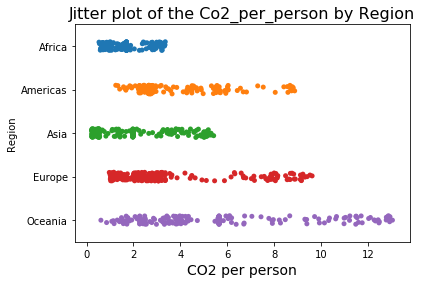

In [123]:
boxplt_df=co2_per_person.groupby('region').mean().T
ax=sns.stripplot(data=boxplt_df,jitter=True,orient='h')
ax.set_xlabel('CO2 per person',fontdict={'size':14})
ax.set_ylabel('Region')
ax.set_title('Jitter plot of the Co2_per_person by Region',fontdict={'size':16})

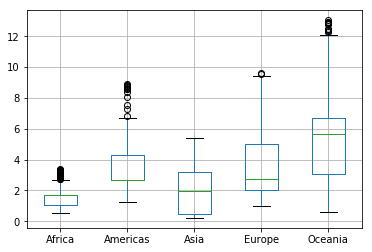

In [124]:
#boxplot_df is a dataframe of the mean $co_2$ emission per person grouped by year and region
#boxplot_df=df_combined.loc[:,['co2_per_person','region','year']].groupby(['year','region']).mean()
#boxplot_df.boxplot(column='co2_per_person',by='region',figsize=(8,6))
#sns.violinplot(data=boxplt_df)
boxplt_df.boxplot()

In [125]:
co2_per_person[co2_per_person['region']=='Oceania']

,country,region,sub-region,1800,1801,1802,1803,1804,1805,1806,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
3,Australia,Oceania,Australia and New Zealand,6.766415,6.766415,6.766415,6.766415,6.766415,6.766415,6.766415,...,17.30,17.80,17.80,18.10,18.20,17.70,17.40,17.00,16.10,15.40
32,New Zealand,Oceania,Australia and New Zealand,4.533693,4.533693,4.533693,4.533693,4.533693,4.533693,4.533693,...,8.26,7.99,7.95,7.99,7.49,7.27,7.13,7.64,7.41,7.59


In [126]:
co2_per_person[co2_per_person['region']=='Americas']

,country,region,sub-region,1800,1801,1802,1803,1804,1805,1806,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
1,Argentina,Americas,South America,2.138937,2.138937,2.138937,2.138937,2.138937,2.138937,2.138937,...,4.14,4.43,4.38,4.68,4.41,4.56,4.60,4.57,4.46,4.75
8,Brazil,Americas,South America,0.818841,0.818841,0.818841,0.818841,0.818841,0.818841,0.818841,...,1.86,1.84,1.90,2.01,1.88,2.13,2.21,2.34,2.49,2.59
10,Canada,Americas,Northern America,0.005680,0.005610,0.005550,0.005480,0.005420,0.005360,0.005290,...,17.30,16.70,16.80,16.80,15.90,15.60,15.60,14.80,14.70,15.10
11,Chile,Americas,South America,1.823042,1.823042,1.823042,1.823042,1.823042,1.823042,1.823042,...,3.83,3.97,4.34,4.31,3.97,4.25,4.62,4.68,4.77,4.69
15,Ecuador,Americas,South America,0.988042,0.988042,0.988042,0.988042,0.988042,0.988042,0.988042,...,2.20,2.07,2.24,2.34,2.46,2.44,2.54,2.47,2.62,2.76
30,Mexico,Americas,Central America,2.152221,2.152221,2.152221,2.152221,2.152221,2.152221,2.152221,...,4.30,4.35,4.30,4.34,4.12,3.96,4.07,4.11,4.00,3.87
35,Peru,Americas,South America,0.821087,0.821087,0.821087,0.821087,0.821087,0.821087,0.821087,...,1.34,1.25,1.52,1.43,1.78,1.96,1.67,1.83,1.87,1.99
45,Trinidad and Tobago,Americas,Caribbean,12.466504,12.466504,12.466504,12.466504,12.466504,12.466504,12.466504,...,29.40,32.70,34.70,33.70,34.00,36.10,35.20,33.90,34.50,34.20


In [127]:
co2_per_person.loc[:,'2014'].mean()

6.263647058823529

get the countries with the above average $co_2$ per person

In [128]:
Co2_above_average=co2_per_person[['country','region','2014']][co2_per_person['2014']>=6]

In [129]:
Co2_above_average.groupby(['region','country']).mean()

2014
region   country                   
Africa   South Africa          8.98
Americas Canada               15.10
         Trinidad and Tobago  34.20
Asia     China                 7.40
         Japan                 9.47
         Kazakhstan           14.20
         Turkmenistan         12.50
Europe   Austria               6.80
         Belarus               6.69
         Belgium               8.32
         Czech Republic        9.10
         Finland               8.66
         Germany               8.83
         Ireland               7.27
         Netherlands           9.91
         Norway                9.27
         Poland                7.46
Oceania  Australia            15.40
         New Zealand           7.59

In [130]:
Co2_above_average.groupby('region').count()

,country,2014
region,,
Africa,1,1
Americas,2,2
Asia,4,4
Europe,10,10
Oceania,2,2


The above boxplot and jitterplot shows us that Oceania region has emitted more $co_2$ per person on average, however looking at the data more closely shows us that oceania has only 2 countries in our dataset, meaning the mean value of Oceania isn't affected by any outliers. However Trididad and Tobago on average emitts the most $co_2$ per person, and Europe has the most number of countries which emmited above average $co_2$ per person in 2014.

#### Lets see how the other variables fair with respect to income per capita and how the variables correlates with each other.

In [131]:
plt_df=df_combined.groupby('year', as_index=False).mean()

In [132]:
plt_df.corr()

,year,income,hdi,co2_per_person,Child_mortality,Life_expectancy,self_employed
year,1.000000,0.982734,0.998130,0.386640,-0.998992,0.986690,-0.933290
income,0.982734,1.000000,0.986137,0.531927,-0.987536,0.963532,-0.905847
hdi,0.998130,0.986137,1.000000,0.416972,-0.997071,0.991510,-0.946061
co2_per_person,0.386640,0.531927,0.416972,1.000000,-0.414582,0.364573,-0.333499
Child_mortality,-0.998992,-0.987536,-0.997071,-0.414582,1.000000,-0.981327,0.924261
Life_expectancy,0.986690,0.963532,0.991510,0.364573,-0.981327,1.000000,-0.970639
self_employed,-0.933290,-0.905847,-0.946061,-0.333499,0.924261,-0.970639,1.000000


We can see that income per capita corrolates positively and strongly with human development index(hdi). HDI is a statistic that is composed of Education,Income and life Expectancy, thus we expect it to correlate strongly with income per capita since it(income) is a variable of HDI.

Lets visualise some of these viriations using a scatter plot with regression line.

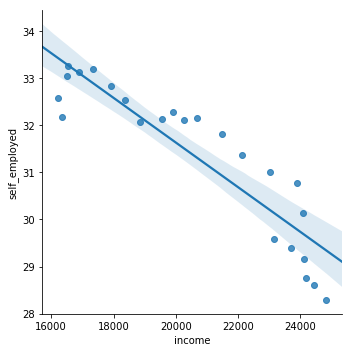

In [133]:
lm=sns.lmplot(x='income',y='self_employed',data=plt_df,fit_reg=True)
fig=lm.fig
fig.subptitle=('Scatter Plot with Regression: Self Employed VS Income')

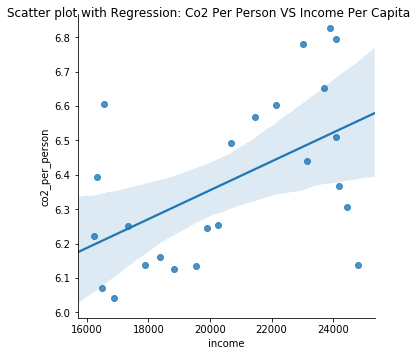

In [134]:
lm=sns.lmplot(y='co2_per_person',x='income',data=plt_df,fit_reg=True)
fig=lm.fig
fig.suptitle('Scatter plot with Regression: Co2 Per Person VS Income Per Capita')

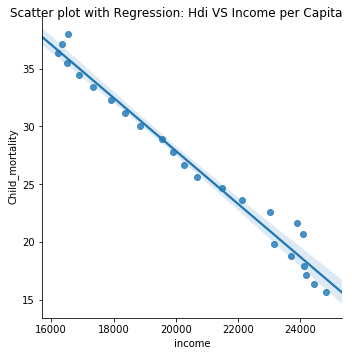

In [135]:
lm=sns.lmplot(x='income',y='Child_mortality',fit_reg=True,data=plt_df)
fig=lm.fig
fig.suptitle('Scatter plot with Regression: Hdi VS Income per Capita')


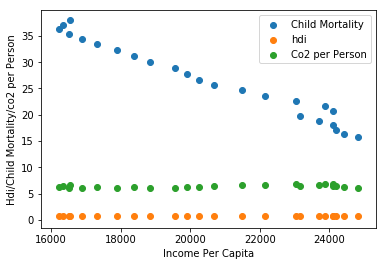

In [136]:
plt2.scatter(plt_df['income'],plt_df['Child_mortality'],label='Child Mortality')
plt2.scatter(plt_df['income'],plt_df['hdi'],label='hdi')
plt2.scatter(plt_df['income'],plt_df['co2_per_person'],label='Co2 per Person')
plt2.xlabel('Income Per Capita')
plt2.ylabel('Hdi/Child Mortality/co2 per Person')
plt2.legend()


#### Change in child mortality by region

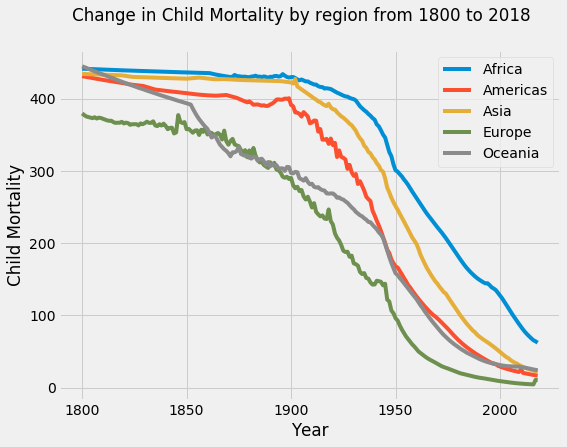

In [116]:
ax=child_mortality.groupby('region').mean().T
fig=plt2.figure(figsize=(8,6))
plt2.plot(ax)
plt2.xlabel('Year')
plt2.ylabel('Child Mortality')
plt2.legend(ax.columns)
plt2.style.use('fivethirtyeight')
fig.suptitle('Change in Child Mortality by region from 1800 to 2018')

Child mortality appears to reduce as a country advances.

<a id='conclusions'></a>
## Conclusions

From our first plot we observe that income per capita increased as the years went by, further investigations showed that as income per capita increased, life expectancy increased. This relationship is not linear and cannot be said to be causal.

Further studies not captured in this analysis shows that the change in life expectancy occurs at different rates for different countries and is independent of changes in income for some countries, rather attributing some of the factors responsible for increase in life expectancy in countries, especially poorer ones, to education, better technology, vaccinations etc.

One interesting thing about this analysis is the Jitterplot and boxplot on $co_2$ emission by region. At face value, it showed that Oceania had the highest emission values per person, but we looked closer, and realised that according to our dataset,in 2014, Europe had more countries combined emmiting more $CO_2$ per person above the average levels, and Trinidad and Tobago emitted the highest levels per person. Further analysis will need to be carried out before we can ascertain causality and directionality between $CO_2$ emission per person and Income per capita.  
 
From the correlation table, as well as observing the Scatter plot, we saw that the variable "Self employed" has a strong negative correlation with income per capita, which implies that richer countries tend to have less entrepreneurs i.e people that are self employed. 

Child Mortality has a strong negative correlation with income per capita implying that richer countries lose less babies at child birth. Notice that although there is a strong correlation between the two variables, we aren't still implying causation because other lurknig variables may be the direct cause of this. i.e Countries with higher income per capita may have more medical personnel per 1000 patients, meaning such countries will be in a better position to effect safer child deliveries.

From our last graph we can denote that for each of the five regions, child mortality is reducing. 

This analysis isn't full proof because of incomplete dataset. We had to drop some records which resulted in a dataset with reduced sample size, thereby reducing the statistical power of the analysis.

### Refrences
<Ol>
<li>https://www.researchgate.net/publication/321225902_GHG_Emissions_in_Trinidad_and_Tobago</li>
<li>https://www.researchgate.net/publication/297750732_Life_Expectancy_In_Zimbabwe_An_Analysis_Of_Five_Decades</li>
<li>https://en.wikipedia.org/wiki/Human_Development_Index</li>
<li>https://www.theanalysisfactor.com/when-listwise-deletion-works/</li>
<li>https://seaborn.pydata.org/generated/seaborn.stripplot.html</li>
<li>https://en.wikipedia.org/wiki/Preston_curve</li>
<li>https://hub.mybinder.org/user/bloomberg-bqplot-ttvdwo1x/notebooks/examples/Index.ipynb</li>
</Ol>